In [6]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X_train = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y_train = mnist.train.labels

X_test = np.vstack([img.reshape(-1,) for img in mnist.test.images])
y_test = mnist.test.labels

del mnist

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
"""
mnist_loader
~~~~~~~~~~~~
A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

#### Libraries
# Standard library
import pickle as cPickle
import gzip

# Third-party libraries
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('MNIST_data/train-images-idx3-ubyte.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [8]:
# get training data
training_data, validation_data, test_data = load_data_wrapper()

UnpicklingError: invalid load key, '\x00'.

In [8]:
%matplotlib notebook
import torch
import torchvision
import numpy as np
batch_size_train = 1
batch_size_test = 60

In [2]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./mnist-data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               #torchvision.transforms.Normalize(
                               #  (0.1307,), (0.3081,))
                             ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./mnist-data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               #torchvision.transforms.Normalize(
                               #  (0.1307,), (0.3081,))
                             ])),
    batch_size=batch_size_test, shuffle=True)

In [3]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

<IPython.core.display.Javascript object>


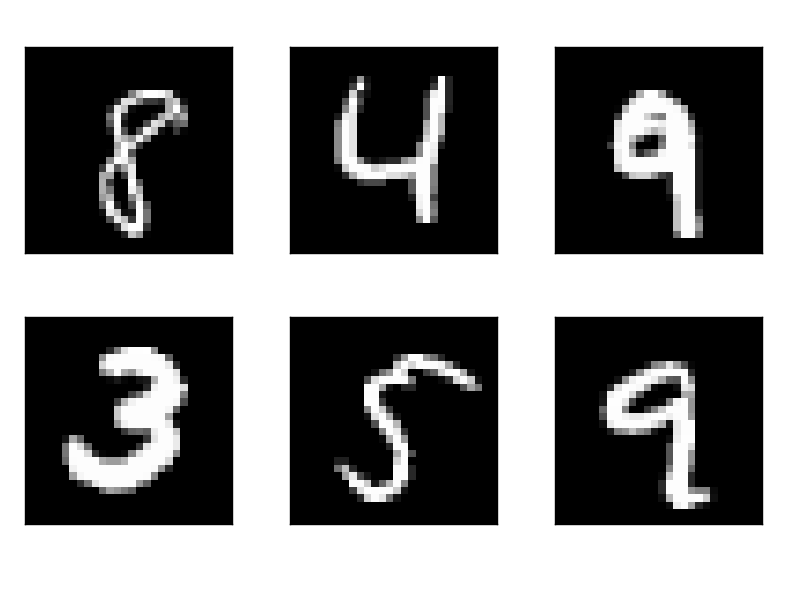

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    #plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig.show()

In [10]:
np.shape(example_data[0][0])

torch.Size([28, 28])

<IPython.core.display.Javascript object>


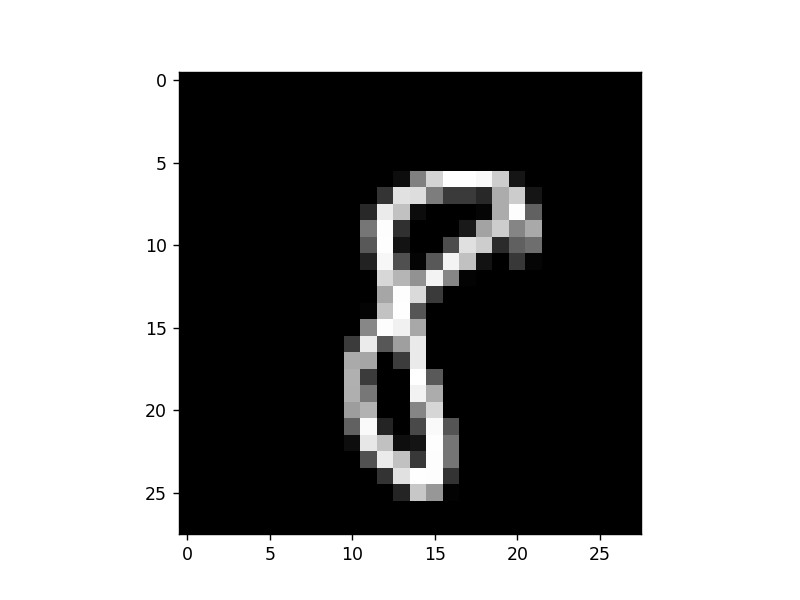

In [13]:
plt.figure()
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

plt.show()

<IPython.core.display.Javascript object>


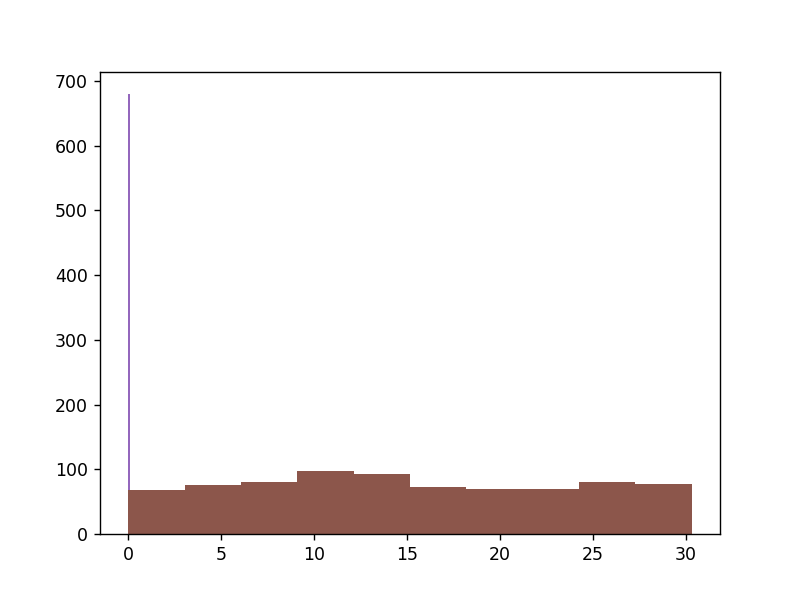

In [25]:
plt.figure()
plt.hist(example_data[0][0].flatten(), 10)
plt.show()

In [12]:
import pprint
pprint.pprint(np.around(example_data[0][0].numpy(), 3))

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   

In [79]:
X  = example_data[0][0].numpy()
X.shape

(28, 28)

In [80]:
n_activations = 1 # linear activation units
n_inputs = 28*28+1
W1 = np.random.random((n_activations, n_inputs))
W1.shape

(1, 785)

In [81]:
# Activations
X_flat = np.concatenate((X.flatten(), [1]))
X_flat = X_flat.flatten()
a = np.dot(W1, X_flat)

In [82]:
# To get a prediction
X_hat = np.dot(a, W1)

<IPython.core.display.Javascript object>


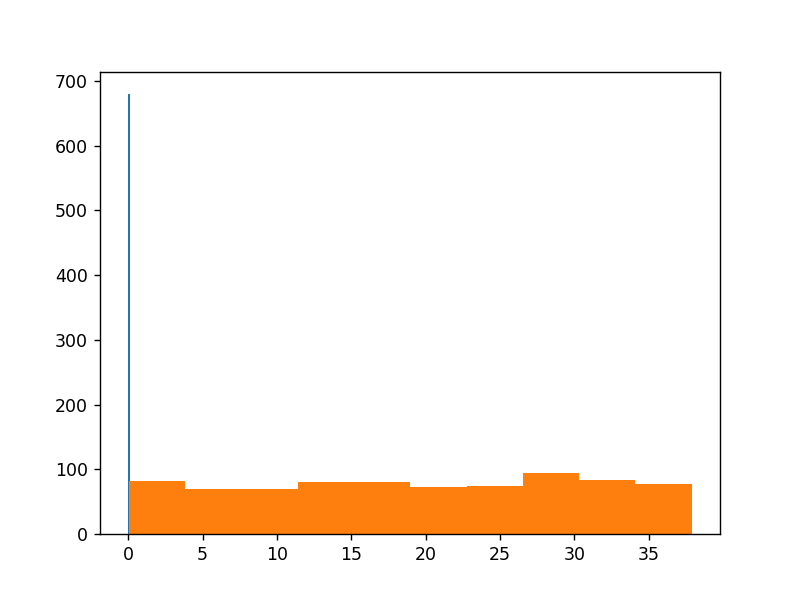

In [83]:
plt.figure()
plt.hist(X_flat)
plt.hist(X_hat)
plt.scatter(15, a)
plt.show()

In [76]:
norm2 = lambda x: np.inner(x, x)

In [97]:
loss = norm2((X_hat - X_flat)) + np.dot(np.abs(W1), X_flat)
loss 

array([387018.38768958])

In [98]:
# partial derivative wrt each Wij is just Xij for a linear model
W1 = W1 + 1e-4 * X_flat * (-loss)

In [112]:
# Batch mode
X  = example_data[:,0,:,:].numpy()
X.shape

(60, 28, 28)

In [136]:
batch_size = 60
bias = np.ones(batch_size)
print('input X: \t\t', X.shape)
X_flat = np.concatenate((X.reshape(60, -1), bias.reshape(60, -1)), axis=1)
print('X flatten + bias:\t',X_flat.shape)

input X: 		 (60, 28, 28)
X flatten + bias:	 (60, 785)


In [142]:
# Activations
batch_size = 60
A = np.dot(W1, X_flat.transpose())
A.shape

(1, 60)